In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def show(image):
    cv2.imshow("image",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [28]:
def defaultHistogramFunction(image):
    hist,bins = np.histogram(image.flatten(),256,[0,256])
    print(hist)
    plt.hist(image.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.show()

In [4]:
def generateHistogram(image):
    data = {}
    for i in range(256):
        data[i] = 0
    h,w = image.shape
    for i in range(w):
        for j in range(h):
            data[image[j][i]] += 1
            
#     x_range = np.arange(0,256,1)
#     plt.xlim([0,256])
#     plt.bar(x_range,data.values())
    return data.values()

In [5]:
def cummulativeSum(data):
    csum = []
    temp_sum = 0
    for i in data:
        temp_sum += i
        csum.append(temp_sum)
    return np.array(csum)

In [30]:
img = cv2.imread('../images_1/haze1.tif', 0) 
equ = cv2.equalizeHist(img) 
res = np.hstack((img, equ)) 
show(res)

In [29]:
img1 = cv2.imread('../images_1/haze1.tif', 0) 
flat = img1.flatten()

In [31]:
x_range = np.arange(0,256,1)
hist_values = generateHistogram(img1)

In [32]:
sum(hist_values)

16777216

<BarContainer object of 256 artists>

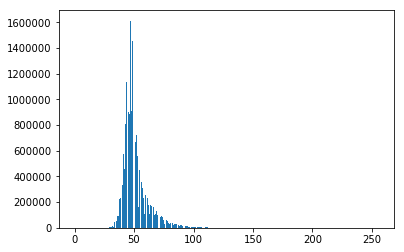

In [33]:
plt.bar(x_range,hist_values)

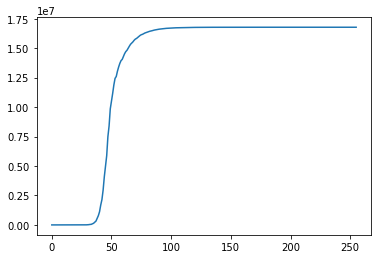

In [34]:
cSum = cummulativeSum(hist_values)
plt.plot(cSum)

dtype('uint8')

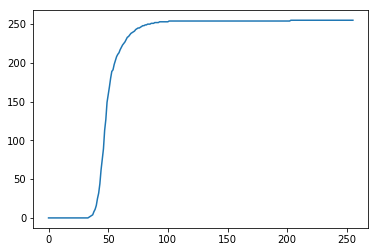

In [35]:
nFactor = max(cSum) - min(cSum)
num = (cSum - min(cSum))
num = num * 255
s_k = num/nFactor
s_k = s_k.astype(np.uint8)
plt.plot(s_k)
s_k.dtype

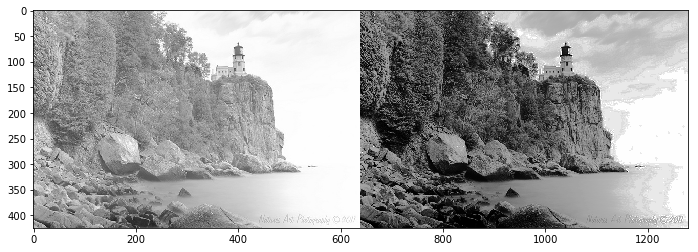

In [27]:
img1_new = s_k[flat]
img1_new = np.reshape(img1_new, img1.shape)
img1_new.shape
# show(img1_new)
fig = plt.figure()
fig.set_figwidth(15)
# fig.add_subplot(2,2,1)
# plt.imshow(img1, cmap='gray')
res_scratch = np.hstack((img1, img1_new)) 

plt.imshow(res_scratch, cmap='gray')
# fig.add_subplot(2,2,2)
# plt.imshow(res, cmap='gray')
show(res_scratch)

[      0       0       0       0       0       0       0       0       0
       0       0       0       0       1       0       0       0       1
       1       0       5      11      43     106      80     355     832
    1422     638    3183    5726    9786   17648    7607   41571   50074
   89973   94107  226776  235509  329609  571205  457722  808389 1136558
  899474  886787 1613477  908677 1454613  638832  666732  722205  556869
  160429  447763  357167  306506  232744  107972  252582  232386  176583
  110983  178643  172665  160897   98769  106521  132691   98717   56350
   84252   90483   81953   60637   32522   58728   52527   36332   32258
   40911   35287   22190   27113   29812   26753   20927   15685   19784
   18758   12670   10813   14622   12250   11991    7304    6836    8245
    6942    4504    5086    5651    5016    4034    2685    3634    3877
    2843    1991    2808    2502    2397    1740    1412    1794    1843
    1195    1135    1453    1433    1261     692   

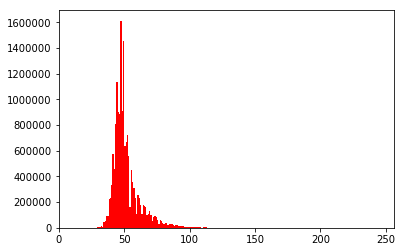

In [37]:
defaultHistogramFunction(img1)